DBSCAN 3大好處
1. 自動依據data特性決定cluster數量
2. 自動找出noise並排除掉
3. Cluster的形狀可以千奇百怪，只要密度夠高

https://www.twblogs.net/a/5db2edecbd9eee310da00f6a  
https://www.reneshbedre.com/blog/dbscan-python.html


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
import pandas as pd

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
df.head(2)

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398


In [3]:
df.shape

(4406, 2)

### 計算 DBSCAN 聚類所需的參數:
對於minPts二維數據集應該是 4。對於多維數據集，minPts應該是2 * number of dimensions. 例如，如果您的數據集有 6 個特徵，則設置minPts = 12.

MinPts 值的經驗法則：  
- 數據集越大，MinPts的值應該越大  
- 如果數據集噪聲較大，則選擇較大的 MinPts 值  
- 一般MinPts應該大於等於數據集的維度  
- 對於二維數據，使用 DBSCAN 的默認值 MinPts = 4 (Ester et al., 1996)。  
- 如果您的數據有超過 2 個維度，請選擇 MinPts = 2*dim，其中 dim = 數據集的維度 (Sander et al., 1998)。  

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
# 此教學的推薦是將鄰居數量設為與minPts接近或相同 2*2=4 
nbrs = NearestNeighbors(n_neighbors=5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

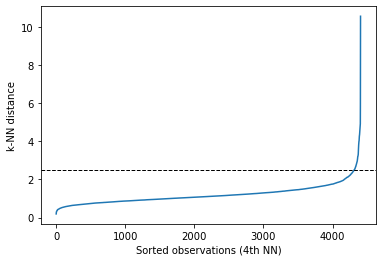

In [5]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [9]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2.5, min_samples=4).fit(df)
# get cluster labels
clusters.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 834,
         1: 1501,
         2: 703,
         3: 285,
         4: 145,
         5: 245,
         6: 232,
         7: 283,
         8: 11,
         9: 11,
         -1: 34,
         10: 5,
         11: 13,
         12: 46,
         22: 4,
         13: 6,
         14: 10,
         15: 8,
         16: 4,
         17: 8,
         18: 5,
         19: 5,
         20: 4,
         21: 4})

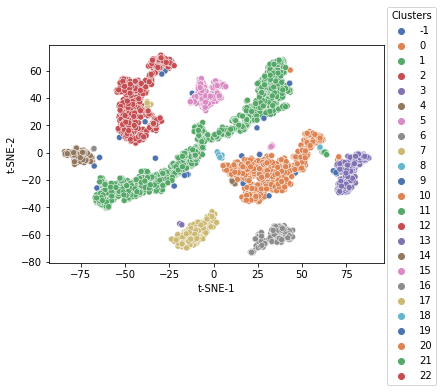

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()